<a href="https://colab.research.google.com/github/pcf26536/TeamNM5/blob/SamBranch/variable_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/pcf26536/TeamNM5/main/df_train.csv', index_col = 0)
df_train.head(11)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.0,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,0.0,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,0.0,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,0.0,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,0.0,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/pcf26536/TeamNM5/main/df_test.csv', index_col = 0)
df_test.head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [ ]:
df_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,13.0
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.0
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,52.0
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,100.0
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,100.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [ ]:
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [ ]:
df_train.Valencia_pressure.fillna(df_train['Valencia_pressure'].mean(), inplace=True)

In [ ]:
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)')
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].astype(int)

In [ ]:
df_train['Valencia_wind_deg'].head()

0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: int64

In [ ]:
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)')
df_train['Seville_pressure'] = df_train['Seville_pressure'].astype(int)

In [ ]:
df_train['Seville_pressure'].head()

0    25
1    25
2    25
3    25
4    25
Name: Seville_pressure, dtype: int64

In [ ]:
df_train['time'] = pd.to_datetime(df_train['time'])
df_train['Day'] = df_train['time'].dt.day
df_train['Month'] = df_train['time'].dt.month
df_train['Year'] = df_train['time'].dt.year
df_train['Hour'] = df_train['time'].dt.hour

In [ ]:
df_train[['time', 'Day', 'Month', 'Year', 'Hour']].head()

,time,Day,Month,Year,Hour
0,2015-01-01 03:00:00,1,1,2015,3
1,2015-01-01 06:00:00,1,1,2015,6
2,2015-01-01 09:00:00,1,1,2015,9
3,2015-01-01 12:00:00,1,1,2015,12
4,2015-01-01 15:00:00,1,1,2015,15


In [ ]:
df_train.shape

(8763, 52)

In [ ]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Hour
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015,3
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015,6
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,1,1,2015,9
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,1,1,2015,12
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,1,1,2015,15


In [ ]:
temp_cols=df_train.columns.tolist()
index=df_train.columns.get_loc("load_shortfall_3h")
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:]
df_train2=df_train[new_cols]

In [ ]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Hour
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015,3
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015,6
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,1,1,2015,9
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,1,1,2015,12
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,1,1,2015,15


In [ ]:
df_train2.head()

,load_shortfall_3h,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Hour
0,6715.666667,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1,1,2015,3
1,4171.666667,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1,1,2015,6
2,4274.666667,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,1,1,2015,9
3,5075.666667,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,1,1,2015,12
4,6620.666667,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,1,1,2015,15


**Checking for Linearity**

The first thing we need to check is the mathematical relationship between each predictor variable and the response variable. What we are looking for here is known as linearity. A linear relationship means that a change in the response Y due to a one-unit change in the predictor Xj is constant, regardless of the value of Xj.

If we fit a regression model to a dataset that is non-linear, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. In order to check for linearity, we can produce scatter plots of each individual predictor against the response variable. The intuition here is that we are looking for obvious linear relationships.

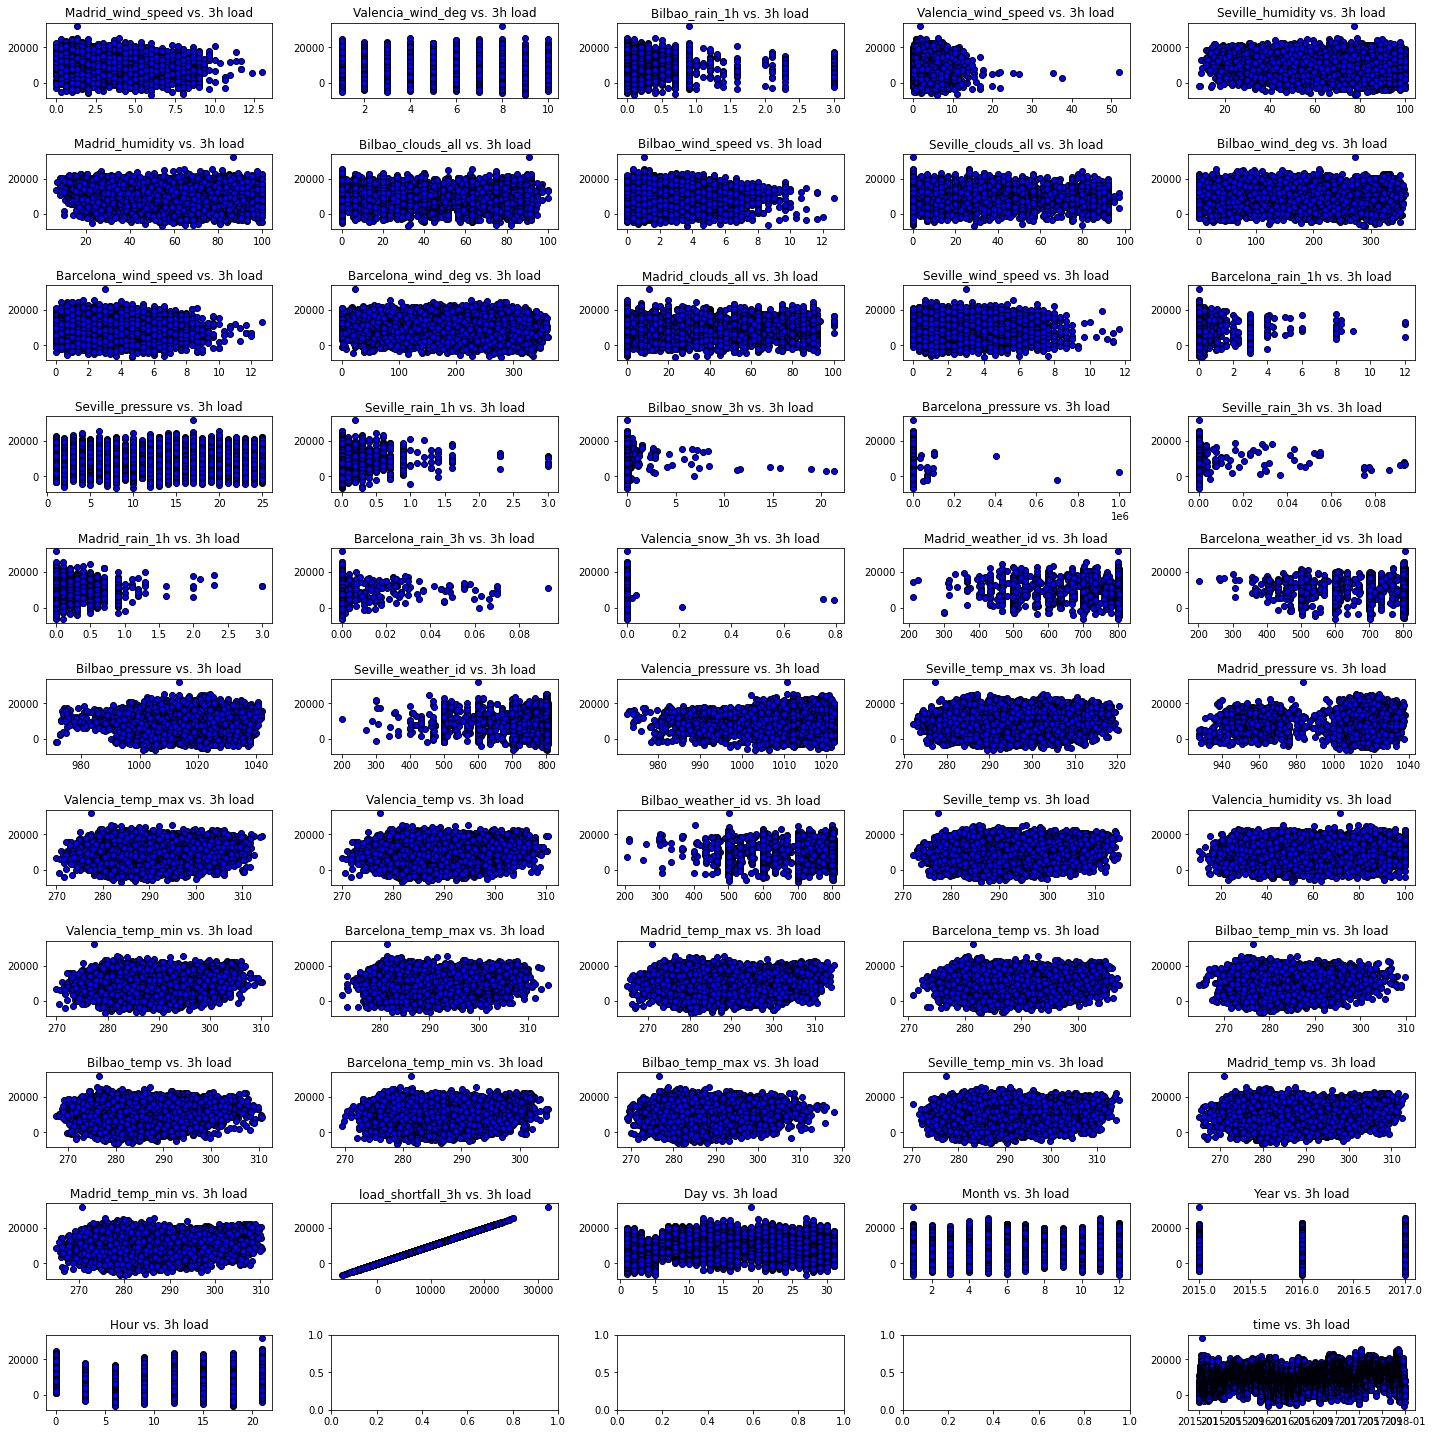

In [ ]:
fig, axs = plt.subplots(11,5,figsize=(20,20))
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df_train.columns):
    axs[index-1].set_title("{} vs. 3h load".format(column),fontsize=12)
    axs[index-1].scatter(x=df_train[column],y=df_train['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

**Checking for Multicollinearity**

Multicollinearity refers to the presence of strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

It tends to increase the standard error;

It becomes difficult to estimate the effect of any one predictor variable on the response variable.

We will check for multicollinearity by generating pairwise scatter plots among predictors, and further, generating a correlation heatmap

We will check for Multicollinearity using Pairwise Scatter Plots

In [ ]:
from seaborn import pairplot
pairplot(df_train)

In [ ]:
corr = df_train.drop('load_shortfall_3h', axis='columns').corr()

In [ ]:
from statsmodels.graphics.correlation import plot_corr

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#fig1=plot_corr(corr,xnames=corr.columns)

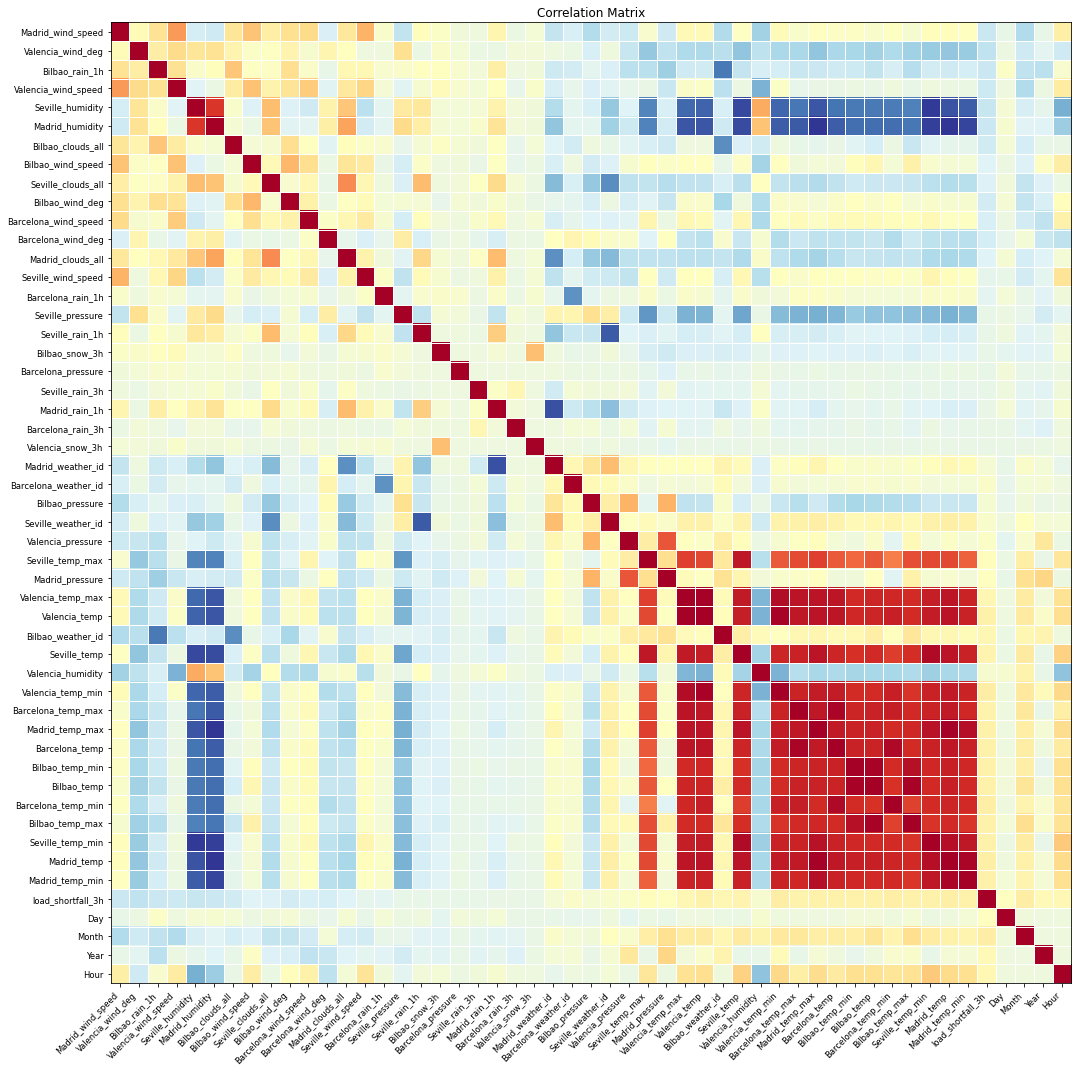

In [ ]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax);

In [ ]:
column_titles = [col for col in df_train.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_train=df_train.reindex(columns=column_titles)
df_train.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Hour,load_shortfall_3h
Madrid_wind_speed,1.000000,0.121835,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.089992,0.042114,0.110278,0.109572,0.098138,-0.029954,-0.237445,-0.031553,0.186228,-0.150981
Valencia_wind_deg,0.121835,1.000000,0.199288,0.292731,0.240007,0.253549,0.158266,0.075864,0.085519,0.157252,...,-0.240981,-0.292904,-0.311775,-0.337965,-0.316603,-0.010627,-0.140195,-0.057513,-0.138415,-0.188674
Bilbao_rain_1h,0.259719,0.199288,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,0.072752,-0.188274,-0.200747,0.054527,-0.152510
Valencia_wind_speed,0.513092,0.292731,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.000340,-0.237156,-0.012650,0.204103,-0.142791
Seville_humidity,-0.117892,0.240007,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,0.032979,-0.111622,-0.045730,-0.424982,-0.167290
Madrid_humidity,-0.137092,0.253549,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,0.047372,-0.076567,-0.084456,-0.307872,-0.150536
Bilbao_clouds_all,0.244001,0.158266,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,0.025688,-0.117452,-0.031658,-0.023714,-0.127293
Bilbao_wind_speed,0.377854,0.075864,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.023711,0.177123,0.055077,0.031245,0.021425,-0.008020,-0.086698,0.082611,0.197848,-0.081602
Seville_clouds_all,0.191251,0.085519,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,0.010582,-0.170345,-0.089657,-0.017401,-0.091804
Bilbao_wind_deg,0.270950,0.157252,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.086482,0.031187,0.062663,0.044102,0.048397,0.034253,-0.174941,-0.104647,0.110457,-0.120800


**Detecting Multicollinearity Using Variance Inflation Factors**

A variance inflation factor (VIF) quantifies how much the variance is inflated

In [ ]:
#Using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif= df_train.drop(["load_shortfall_3h", "time"], axis=1)
df_vif2= pd.DataFrame()
df_vif2["Features"] = df_vif.columns
df_vif2["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

In [ ]:
print(df_vif2)

                Features           VIF
0      Madrid_wind_speed  5.287507e+00
1      Valencia_wind_deg  6.731494e+00
2         Bilbao_rain_1h  2.049649e+00
3    Valencia_wind_speed  4.267956e+00
4       Seville_humidity  4.819158e+01
5        Madrid_humidity  4.220562e+01
6      Bilbao_clouds_all  4.548659e+00
7      Bilbao_wind_speed  4.110832e+00
8     Seville_clouds_all  2.710942e+00
9        Bilbao_wind_deg  5.366442e+00
10  Barcelona_wind_speed  4.888579e+00
11    Barcelona_wind_deg  7.029035e+00
12     Madrid_clouds_all  3.351244e+00
13    Seville_wind_speed  4.525684e+00
14     Barcelona_rain_1h  1.541408e+00
15      Seville_pressure  9.620820e+00
16       Seville_rain_1h  2.126551e+00
17        Bilbao_snow_3h  1.270671e+00
18    Barcelona_pressure  1.038449e+00
19       Seville_rain_3h  1.093504e+00
20        Madrid_rain_1h  2.352148e+00
21     Barcelona_rain_3h  1.077283e+00
22      Valencia_snow_3h  1.188981e+00
23     Madrid_weather_id  2.641483e+02
24  Barcelona_weather_id 

In [ ]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [ ]:
df_train3 = df_train2.drop(["load_shortfall_3h", "time"], axis=1)
calculate_vif(df=df_train3, features= df_train3.columns)

,VIF,Tolerance
Madrid_wind_speed,1.952105,0.512268
Valencia_wind_deg,1.543072,0.648058
Bilbao_rain_1h,1.836752,0.544439
Valencia_wind_speed,1.990732,0.502328
Seville_humidity,5.609389,0.178273
Madrid_humidity,6.442612,0.155217
Bilbao_clouds_all,1.672615,0.597866
Bilbao_wind_speed,1.882316,0.531260
Seville_clouds_all,2.055789,0.486431
Bilbao_wind_deg,1.575021,0.634912


**Interpreting VIF Values**

The valid value for VIF ranges from 1 to infinity. A rule of thumb for interpreting VIF values is:

1 — features are not correlated

1<VIF<5 — features are moderately correlated

VIF>5 — features are highly correlated

VIF>10 — high correlation between features and is cause for concern

## Checking for Independence

### Residuals vs. Predictor Variables Plots 

The first check we do involves plotting the residuals (vertical distances between each data point and the regression hyperplane). We are looking to confirm the independence assumption here, i.e.: the residuals should be independent. If they are, we will see:

- Residuals approximately uniformly randomly distributed about the zero x-axes;

- Residuals not forming specific clusters.

In [ ]:
df_train2.head()

,load_shortfall_3h,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Hour
0,6715.666667,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1,1,2015,3
1,4171.666667,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1,1,2015,6
2,4274.666667,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,1,1,2015,9
3,5075.666667,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,1,1,2015,12
4,6620.666667,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,1,1,2015,15


In [ ]:
df_train.head()

In [ ]:
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
formula_str = df_train2.columns[0]+' ~ '+'+'.join(df_train2.columns[1:]); formula_str

'load_shortfall_3h ~ time+Madrid_wind_speed+Valencia_wind_deg+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_pressure+Seville_rain_1h+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Madrid_rain_1h+Barcelona_rain_3h+Valencia_snow_3h+Madrid_weather_id+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_temp+Bilbao_weather_id+Seville_temp+Valencia_humidity+Valencia_temp_min+Barcelona_temp_max+Madrid_temp_max+Barcelona_temp+Bilbao_temp_min+Bilbao_temp+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min+Madrid_temp+Madrid_temp_min+Day+Month+Year+Hour'

In [ ]:
model=sm.ols(formula=formula_str, data=df_train)

In [ ]:
fitted = model.fit()

In [ ]:
print(fitted.summary())

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(15,8),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(df_train2.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df_train2[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(df_train[column])
    xmax = max(df_train[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

**Checking for Homoscedasticity**

**Fitted vs. Residuals**

We can determine this by plotting the magnitude of the fitted values (i.e.: mpg) against the residuals. What we are looking for is the plotted points to approximately form a rectangle. In other words, the magnitude of the residuals should not increase as the fitted values increase (if that is the case, the data will form the shape of a cone on its side).

If the variance is constant, we have observed homoscedasticity. If the variance is not constant, we have observed heteroscedasticity. We can use the same plot to check for outliers: any plotted points that are visibly seperate from the random pattern of the rest of the residuals

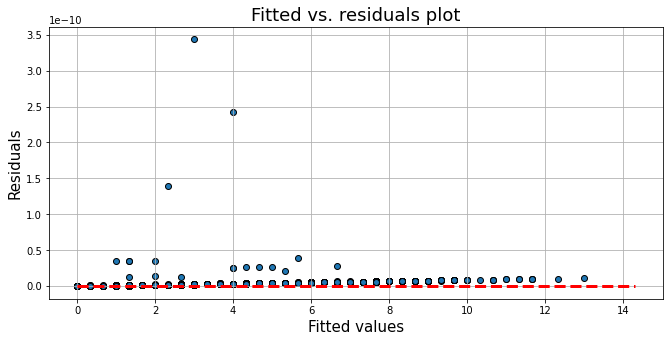

In [ ]:
plt.figure(figsize=(11,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

**Checking for Normality**

Here we attempt to confirm our assumption of normality amongst the residuals. If the residuals are non-normally distributed, confidence intervals can become too wide or too narrow, which leads to difficulty in estimating coefficients based on the minimisation of ordinary least squares.

We can check for violation of the normality assumption by **plotting a histogram of the normalised residuals**:

**Histogram of Normalized Residuals**

We plot a histogram of the residuals to take a look at their distribution. It is fairly easy to pick up when a distribution looks similar to the classic bell curve shape of the normal distribution.

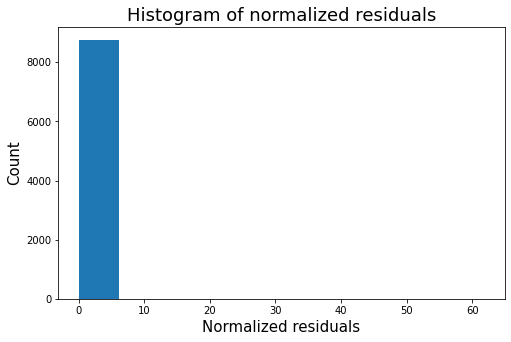

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()